In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.ConvNet.ConvNet import *
from NN_library.ConvNet.train_ConvNet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 8)

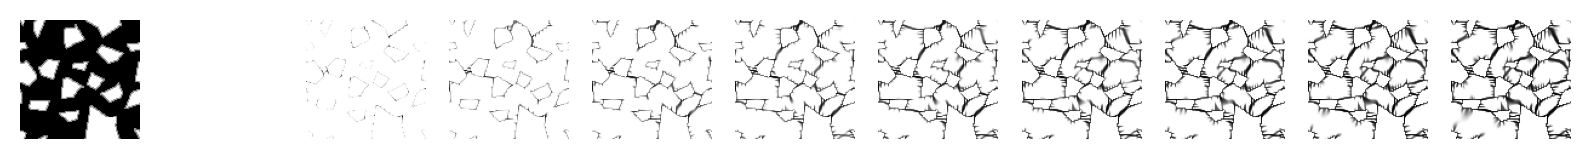

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [24]:
name = 'NN_library/ConvNet/ConvNet'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
net = ConvNet(16)

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 411042


In [25]:
net = load_network(net, args['name']+'_19', args)

In [26]:
losses_train, losses_val = train(net, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.1201951629
Epoch: 0 batch: 100 mean train loss:  0.1811391712
Epoch: 0 batch: 200 mean train loss:  0.1102331780
Epoch: 0 batch: 300 mean train loss:  0.1213407474
Epoch: 0 batch: 400 mean train loss:  0.1017037077
Epoch: 0 batch: 500 mean train loss:  0.1206462115
Epoch: 0 batch: 600 mean train loss:  0.0879170284
Epoch: 0 batch: 700 mean train loss:  0.1383933791
Epoch: 0 batch: 800 mean train loss:  0.1362737894
Epoch: 0 batch: 900 mean train loss:  0.1296297788
Epoch: 0 batch: 1000 mean train loss:  0.0947213146
Epoch: 0 batch: 1100 mean train loss:  0.1436881528
Epoch: 0 batch: 1200 mean train loss:  0.0919267823
Epoch: 0 batch: 1300 mean train loss:  0.1474488902
Epoch: 0 batch: 1400 mean train loss:  0.1003620756
Epoch: 0 mean train loss:  0.1234879133 mean val. rec. loss:  0.1070576906
Epoch: 1 batch: 0 mean train loss:  0.0964713792
Epoch: 1 batch: 100 mean train loss:  0.1282143241
Epoch: 1 batch: 200 mean train loss:  0.1686849856
Epoch:

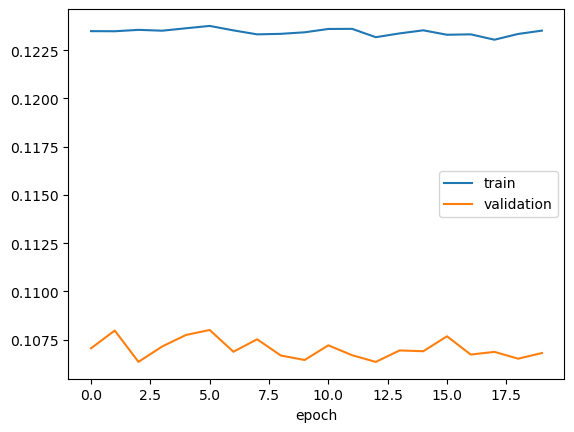

In [27]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])